In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import islets
from scipy.stats import distributions as dst
%config InlineBackend.figure_format='retina'
plt.rcParams["font.size"] = 16
from scipy.spatial import distance_matrix
import pandas as pd

# Regions

In [2]:
k = 11
th = k*.45

res = 64
np.random.seed(0)
points = (np.random.rand(200,2)*res).astype(int)
points = points[np.linalg.norm(points-np.repeat([[res/2]*2], len(points), axis=0),axis=1)<res/2]
while True:
    dd = distance_matrix(points, points)
    indices = np.array(np.triu_indices_from(dd,1)).T
    closest_neighbors = indices[dd[tuple(indices.T)]<th]
    if len(closest_neighbors)==0: break
    todel = pd.Series(closest_neighbors.flatten()).value_counts().index[0]
    points = points[[j!=todel for j in range(len(points))]]

image = np.zeros((res,res))
image[points.T[0], points.T[1]] = 500
m = islets.cmovie(image.reshape(1,res,res))
image = m.gaussian_blur_2D(k,k,k/6,k/6)[0].copy()
image = np.maximum(image, np.percentile(image[image>0],1))
real  = dst.poisson(mu=image+1+m.gaussian_blur_2D(k*2+1,k*2+1,-1,-1)[0]).rvs().astype(float)
vmax = islets.numeric.robust_max(real)//5*5

In [3]:
k0 = k//2
k0

5

In [3]:
ks = [3,5,7]

In [4]:
blur = {}
bkg  = {}
regions = {}
for ir,kk in enumerate(ks):
    blur[kk] = islets.cmovie(real.copy().reshape(1,res,res)).gaussian_blur_2D(kk,kk,-1,-1)[0]
    bkg[kk]  = islets.cmovie(real.copy().reshape(1,res,res)).gaussian_blur_2D(kk*2+1,kk*2+1,-1,-1)[0]
    dimage = blur[kk]-bkg[kk]
    dimage = dimage/islets.numeric.robust_max(dimage)
    regions[kk] = islets.Regions(dimage,mode="custom", verbose=True, img_th=.1)
    regions[kk].purge_lones(k,verbose=True)

Initiating from an image, with a mode custom
dilating valid pixels by 3
initiating the cralwing dict with 2138 pixels excluded.
entering crawling dict with 2138 pixels excluded.
Crawling the image with 2138 pixels excluded.
deleted 7 rois. 70 remain.
Initiating from an image, with a mode custom
dilating valid pixels by 3
initiating the cralwing dict with 2053 pixels excluded.
entering crawling dict with 2053 pixels excluded.
Crawling the image with 2053 pixels excluded.
deleted 2 rois. 63 remain.
Initiating from an image, with a mode custom
dilating valid pixels by 3
initiating the cralwing dict with 1930 pixels excluded.
entering crawling dict with 1930 pixels excluded.
Crawling the image with 1930 pixels excluded.
deleted 1 rois. 61 remain.


In [5]:
# fig2, axs = plt.subplots(3,4,figsize=(9,7.8), gridspec_kw={"width_ratios":[1,1,1,.06]})
# for ir,kk in enumerate(blur):
#     axr = axs[ir]
#     axr[0].text(1.05,.5,r"$-$",transform=axr[0].transAxes, va="center",)
# #     axr[0].set_ylabel(r"kernel = %i"%kk)
# #     txt = dict(zip(ks, ["too small","too large","adequate"]))[kk]
# #     axr[0].set_ylabel(txt+f" (k={kk})")
#     axr[0].set_ylabel(f"k={kk}")
#     axr[1].text(1.05,.5,r"$=$",transform=axr[1].transAxes, va="center",)
#     axr[0].imshow(blur[kk], cmap="hot", vmin=0, vmax=vmax)
#     axr[1].imshow( bkg[kk], cmap="hot", vmin=0, vmax=vmax)
#     dimage = blur[kk]-bkg[kk]
#     dimage = dimage/islets.numeric.robust_max(dimage)
#     im = axr[2].imshow(dimage, cmap="bwr",  vmax = 2,  vmin =-2)
#     if ir==0:
#         cbar = plt.colorbar(im, cax=axr[-1], ticks=[-1.5,0,1.5])
#         cbar.ax.set_yticklabels(["-","bkg","+"])  # vertically oriented colorbar
#     else:
#         axr[-1].remove()
#     for ax in axr[:-1]:
#         ax.set_xticks([])
#         ax.set_yticks([])
#     regions[kk].df["npoints"] = [sum([tuple(pt) in list(map(tuple,px)) for pt in points]) for px in regions[kk].df.pixels]
#     regions[kk].plotEdges(ax=ax, image=False, ix=regions[kk].df.query("npoints==1").index,color="blue",)
#     ix = regions[kk].df.query("npoints!=1").index
#     if len(ix)>0:
#         regions[kk].plotEdges(ax=ax, image=False, ix=ix,color="red",lw=1)
# for ax,txt in zip(axs[0,:-1],["blurred @ k","blurred @ 2k+1", "filtered"]):
#     ax.text(.5,1.15,txt, transform=ax.transAxes, va="center",ha="center")
# axs[0,0].text(1.05,1.15,r"$-$",transform=axs[0,0].transAxes, va="center",)
# axs[0,1].text(1.05,1.15,r"$=$",transform=axs[0,1].transAxes, va="center",)
# for ax in axs[:,2]:
#     ax.plot(points.T[1],points.T[0],"g+",ms=4)
# ax = axs[1,0]
# ax.text(-.2,.5,"kernel size k",transform=ax.transAxes,va="center",ha="center", rotation=90)
# plt.tight_layout()
# axs[-1,2].plot(points.T[1],points.T[0],"g+",ms=4)
# # fig.set_facecolor("y")

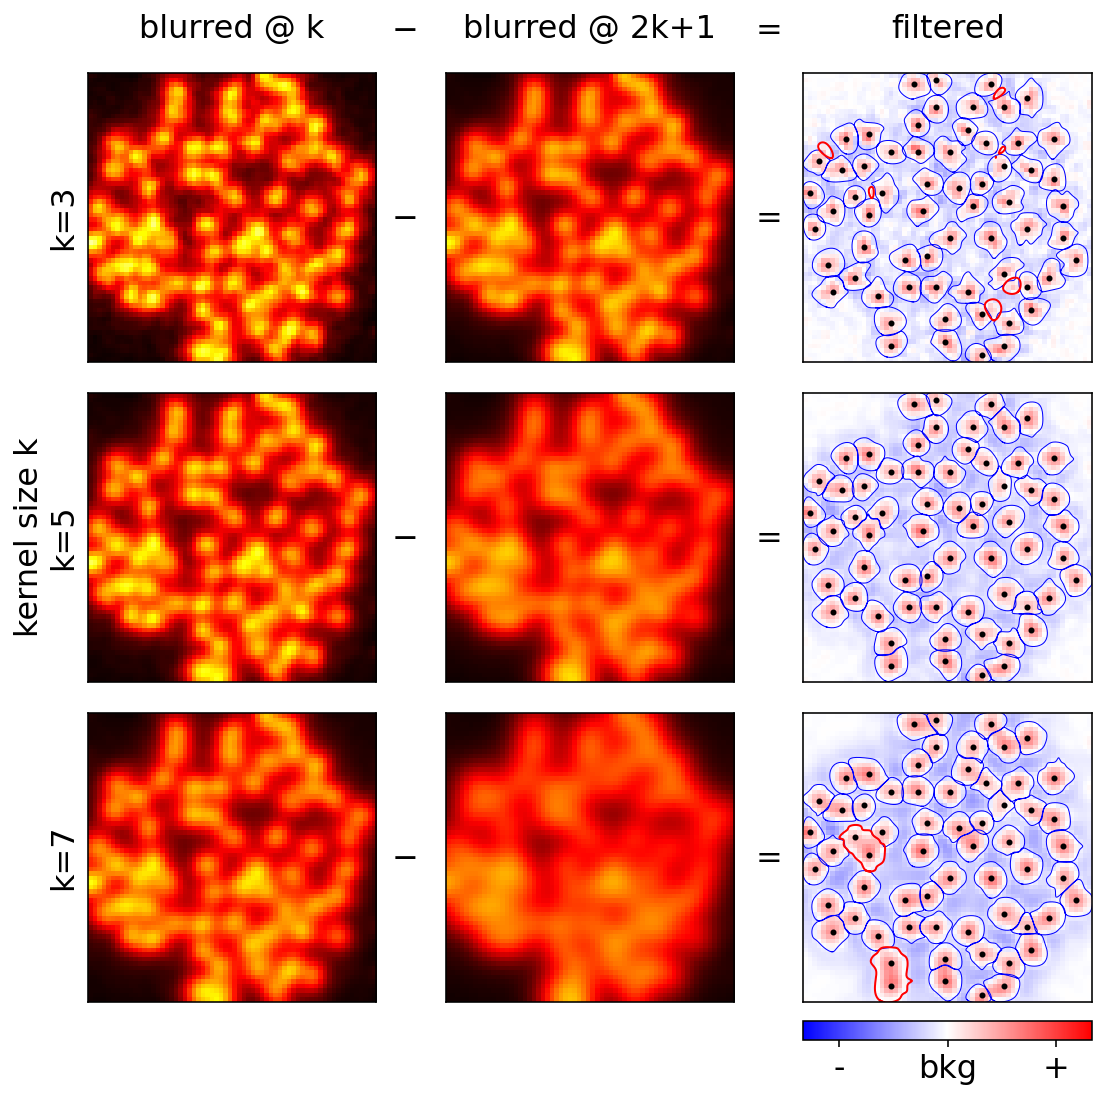

In [6]:
fig2, axs = plt.subplots(4,3,figsize=(9,9), gridspec_kw={"height_ratios":[1,1,1,.06]})
for ir,kk in enumerate(blur):
    axr = axs[ir]
    axr[0].text(1.05,.5,r"$-$",transform=axr[0].transAxes, va="center",)
#     axr[0].set_ylabel(r"kernel = %i"%kk)
#     txt = dict(zip(ks, ["too small","too large","adequate"]))[kk]
#     axr[0].set_ylabel(txt+f" (k={kk})")
    axr[0].set_ylabel(f"k={kk}")
    axr[1].text(1.05,.5,r"$=$",transform=axr[1].transAxes, va="center",)
    axr[0].imshow(blur[kk], cmap="hot", vmin=0, vmax=vmax)
    axr[1].imshow( bkg[kk], cmap="hot", vmin=0, vmax=vmax)
    dimage = blur[kk]-bkg[kk]
    dimage = dimage/islets.numeric.robust_max(dimage)
    im = axr[2].imshow(dimage, cmap="bwr",  vmax = 2,  vmin =-2)
    if ir==0:
        cbar = plt.colorbar(im, cax=axs[-1,-1], ticks=[-1.5,0,1.5], orientation="horizontal")
        cbar.ax.set_xticklabels(["-","bkg","+"])
    for ax in axr:
        ax.set_xticks([])
        ax.set_yticks([])
    regions[kk].df["npoints"] = [sum([tuple(pt) in list(map(tuple,px)) for pt in points]) for px in regions[kk].df.pixels]
    regions[kk].plotEdges(ax=ax, image=False, ix=regions[kk].df.query("npoints==1").index,color="blue",)
    ix = regions[kk].df.query("npoints!=1").index
    if len(ix)>0:
        regions[kk].plotEdges(ax=ax, image=False, ix=ix,color="red",lw=1)
for ax,txt in zip(axs[0],["blurred @ k","blurred @ 2k+1", "filtered"]):
    ax.text(.5,1.15,txt, transform=ax.transAxes, va="center",ha="center")
axs[0,0].text(1.05,1.15,r"$-$",transform=axs[0,0].transAxes, va="center",)
axs[0,1].text(1.05,1.15,r"$=$",transform=axs[0,1].transAxes, va="center",)
for ax in axs[-1,:-1]:
    ax.remove()
for ax in axs[:,-1].flat:
    ax.plot(points.T[1],points.T[0],"k.",ms=4)
ax = axs[1,0]
ax.text(-.2,.5,"kernel size k",transform=ax.transAxes,va="center",ha="center", rotation=90)
plt.subplots_adjust(wspace=.24, hspace=.03)

/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


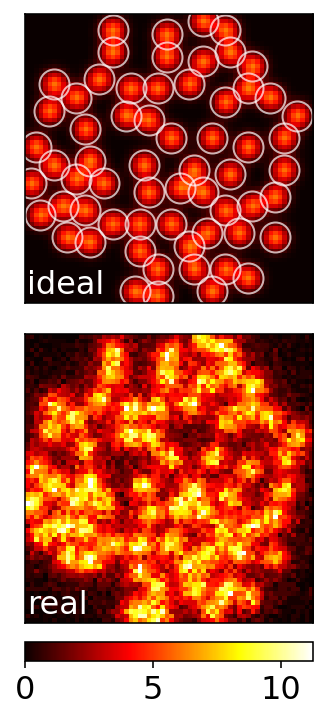

In [9]:
fig1, axss = plt.subplots(4,3,figsize=(9,9), gridspec_kw={"height_ratios":[1,1,1,.06]})
axs = axss[1:,0]

for ax in axs[:-1]:
    ax.set_xticks([])
    ax.set_yticks([])
ax = axs[0]
ax.plot(points.T[1],points.T[0],"wo", mfc="none", ms=15, alpha = .7)
ax.text(0.01,.03,"ideal", transform=ax.transAxes, color="w")
im = ax.imshow(image, cmap="hot", vmax=vmax, vmin=0)
cticks = range(0,41,5)
cbar = plt.colorbar(im, cax=axs[-1], orientation="horizontal")
ax = axs[1]
ax.text(0.01,.03,"real", transform=ax.transAxes, color="w")
ax.imshow(real, cmap="hot",  vmax=vmax, vmin=0)
cbar.ax.set_xticklabels([str(i) for i in cticks])  # vertically oriented colorbar
plt.subplots_adjust(wspace=.24, hspace=.03)
for ax in axss.flat:
    if ax not in axs: ax.remove()

In [10]:
# for ax in axs[:-1]:
#     ax.set_xticks([])
#     ax.set_yticks([])
# ax = axs[0]
# ax.plot(points.T[1],points.T[0],"wo", mfc="none", ms=15, alpha = .7)
# ax.text(0.01,.03,"ideal", transform=ax.transAxes, color="w")
# im = ax.imshow(image, cmap="hot", vmax=vmax, vmin=0)
# cticks = range(0,41,5)
# cbar = plt.colorbar(im, cax=axs[-1], 
# #                     ticks=cticks
#                    )
# ax = axs[1]
# ax.text(0.01,.03,"real", transform=ax.transAxes, color="w")
# ax.imshow(real, cmap="hot",  vmax=vmax, vmin=0)
# cbar.ax.set_yticklabels([str(i) for i in cticks])  # vertically oriented colorbar
# plt.tight_layout()

In [8]:
fig1.savefig("figures/regions_ideal_real.pdf")
fig2.savefig("figures/regions_kernels.pdf")

/home/srdjan/github/Physio_Ca/islets/Regions.py:648: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


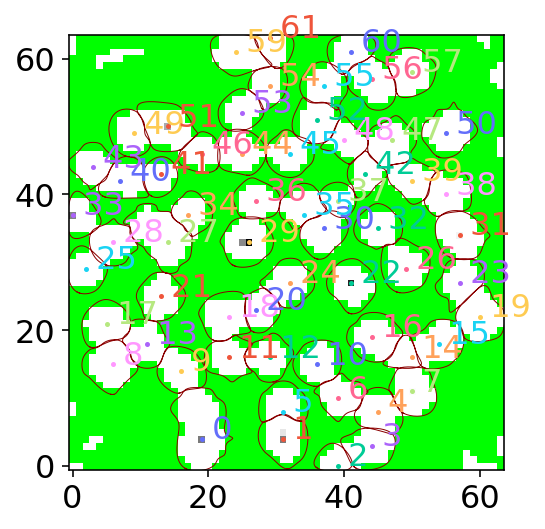

In [26]:
regions[kk].plotEdges()
regions[kk].plotPeaks(labels=True)

(11.35, 27.65)

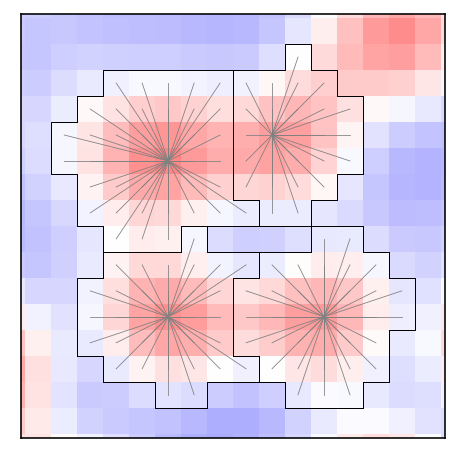

In [32]:
fig3 = plt.figure(figsize=(3,3))
ax = fig3.add_axes([0.01,.01,.98,.98])
ax.set_xticks([])
ax.set_yticks([])
df = regions[kk].df
# for i in df.index:
# for i in [14,15,16,7]:
ixs = [11,12,18,20]
for i in ixs:
    pk = df.loc[i,"peak"]
    for pt in df.loc[i,"pixels"]:
        ax.plot(*np.array([pt,pk]).T[::-1],
                marker=None,
                c="grey",
#                 c="C%i"%(i%10),
                lw=.4,
               )
xl = ax.get_xlim()
yl = ax.get_ylim()
regions[kk].plotEdges(ix=ixs,color="k",spline=False,ax=ax,image=False)
ax.imshow(dimage, cmap="bwr",vmax=2,vmin=-2)
ax.set_xlim(xl[0]-1,xl[1]+1)
ax.set_ylim(yl[0]-1,yl[1]+1)
# ax.set_ylim(yl)

In [33]:
fig3.savefig("figures/regions_stars.pdf")

# Pipeline

In [2]:
reg = islets.load_regions("small_example_rois.pkl")
reg.df = reg.df.loc[[122, 127, 132, 140, 155, 156, 163, 168, 169, 172, 189, 192, 195,
            196, 197, 199, 209, 210, 215, 222, 226, 234, 242, 245, 249, 261,
            262]]
reg.df.index = range(reg.df.shape[0])
reg.update()
reg.df["color"] = list(plt.cm.get_cmap("tab10")(reg.df.index%10))
reg.change_frequency(1)
reg.detrend_traces()

In [3]:
allpxs = sum(reg.df.pixels,[])

xlim = np.asarray(allpxs).T[1].min()-5, np.asarray(allpxs).T[1].max()+6
ylim = np.asarray(allpxs).T[0].min()-7, np.asarray(allpxs).T[0].max()+7

np.diff(xlim), np.diff(ylim)

(array([88]), array([88]))

In [4]:
im = np.log(reg.statImages["mean"]+2)

(9.5, 16.5)

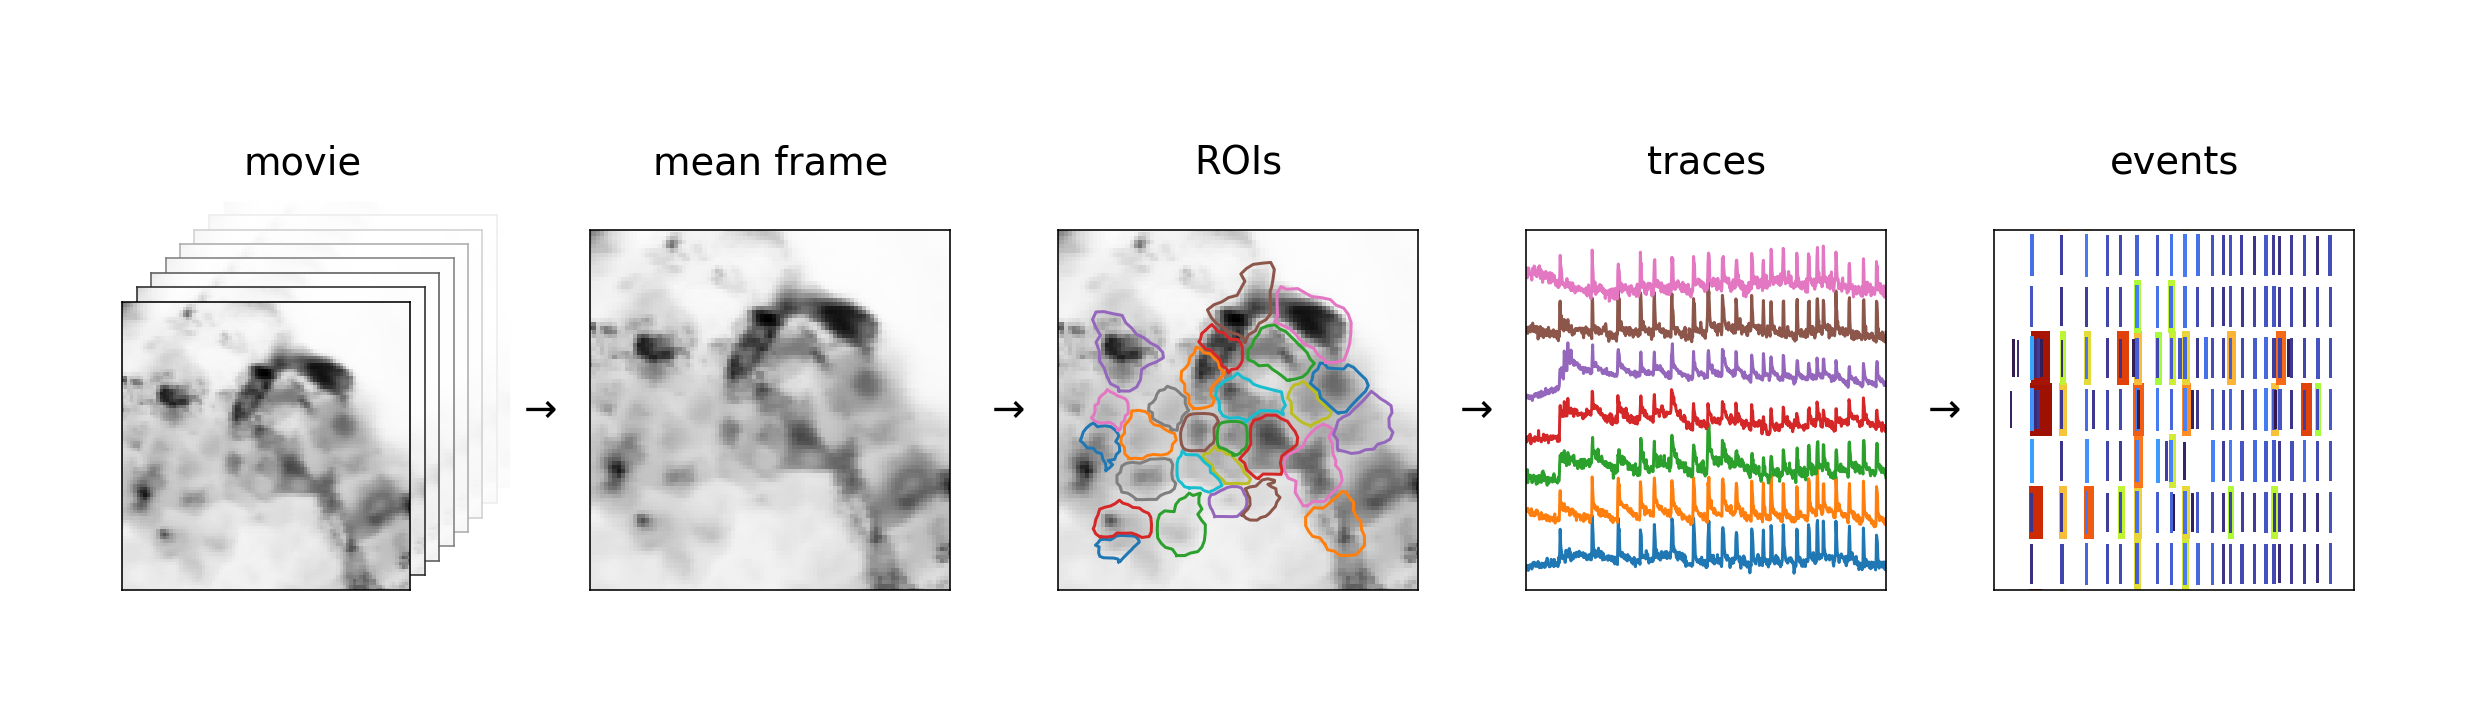

In [10]:
# ts = 3
# evs = reg.detect_events(ts,z_th=3, smooth=0)
evs = islets.EventDistillery.sequential_filtering(reg, timescales=[3,5,10,100], verbose=False)
alpha = .3
w,h = 5+6*alpha,1+3*alpha
fig = plt.figure(figsize=np.array([w,h])*2.5)
# fig.set_facecolor("g")
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([])
ax.set_yticks([])
for sp in ax.spines: ax.spines[sp].set_visible(False)
axs = []
for j in range(5):
    ax = fig.add_axes([(alpha+j*(1+alpha))/w,alpha/h,1/w,1/h])
    if j<3 and j>0:
        ax.imshow(im, cmap="Greys")
    ax.set_xticks([])
    ax.set_yticks([])
    axs += [ax]
ax = axs[0]
for sp in ax.spines: ax.spines[sp].set_visible(False)
axm = []
for j in [7,6,5,4,3,2,1,0]:
    ax = fig.add_axes([(alpha+j*.04)/w,(alpha+j*.04)/h,.8/w,.8/h])
    for sp in ax.spines: ax.spines[sp].set_color(plt.cm.Greys(1-j/7))
    ax.imshow(im/(j+1), cmap="Greys",vmax=im.max())
    ax.set_xticks([])
    ax.set_yticks([])
    axm += [ax]
for j in range(1,5):
    fig.text((alpha/2+j*(1+alpha))/w,(alpha+.5)/h,r"$\rightarrow$",va="center",ha="center", fontsize=20)
# axs[0].remove()
reg.plotEdges(ax=axs[2],image=False, separate=True,lw=1.5, scaleFontSize=0)
for ax in axs[1:-2]+axm:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
for ax,text in zip(axs,["movie","mean frame","ROIs","traces","events"]):
    ax.set_title(text+"\n")
ax = axs[3]
indices = reg.df.index[10:-10]
for i in indices:
    x = reg.df.loc[i,"detrended"]
    x = x-x.mean()
    x = x/x.std()
    ax.plot(x+i*5)
ax.set_xlim(0,len(x))
islets.EventDistillery.plot_events(
    evs,
    ax=axs[-1],
    min_height=.7,
    xc=10
)
axs[-1].set_ylim(indices[0]-.5,indices[-1]+.5)

In [11]:
fig.savefig("figures/pipeline.pdf")

# Z-score

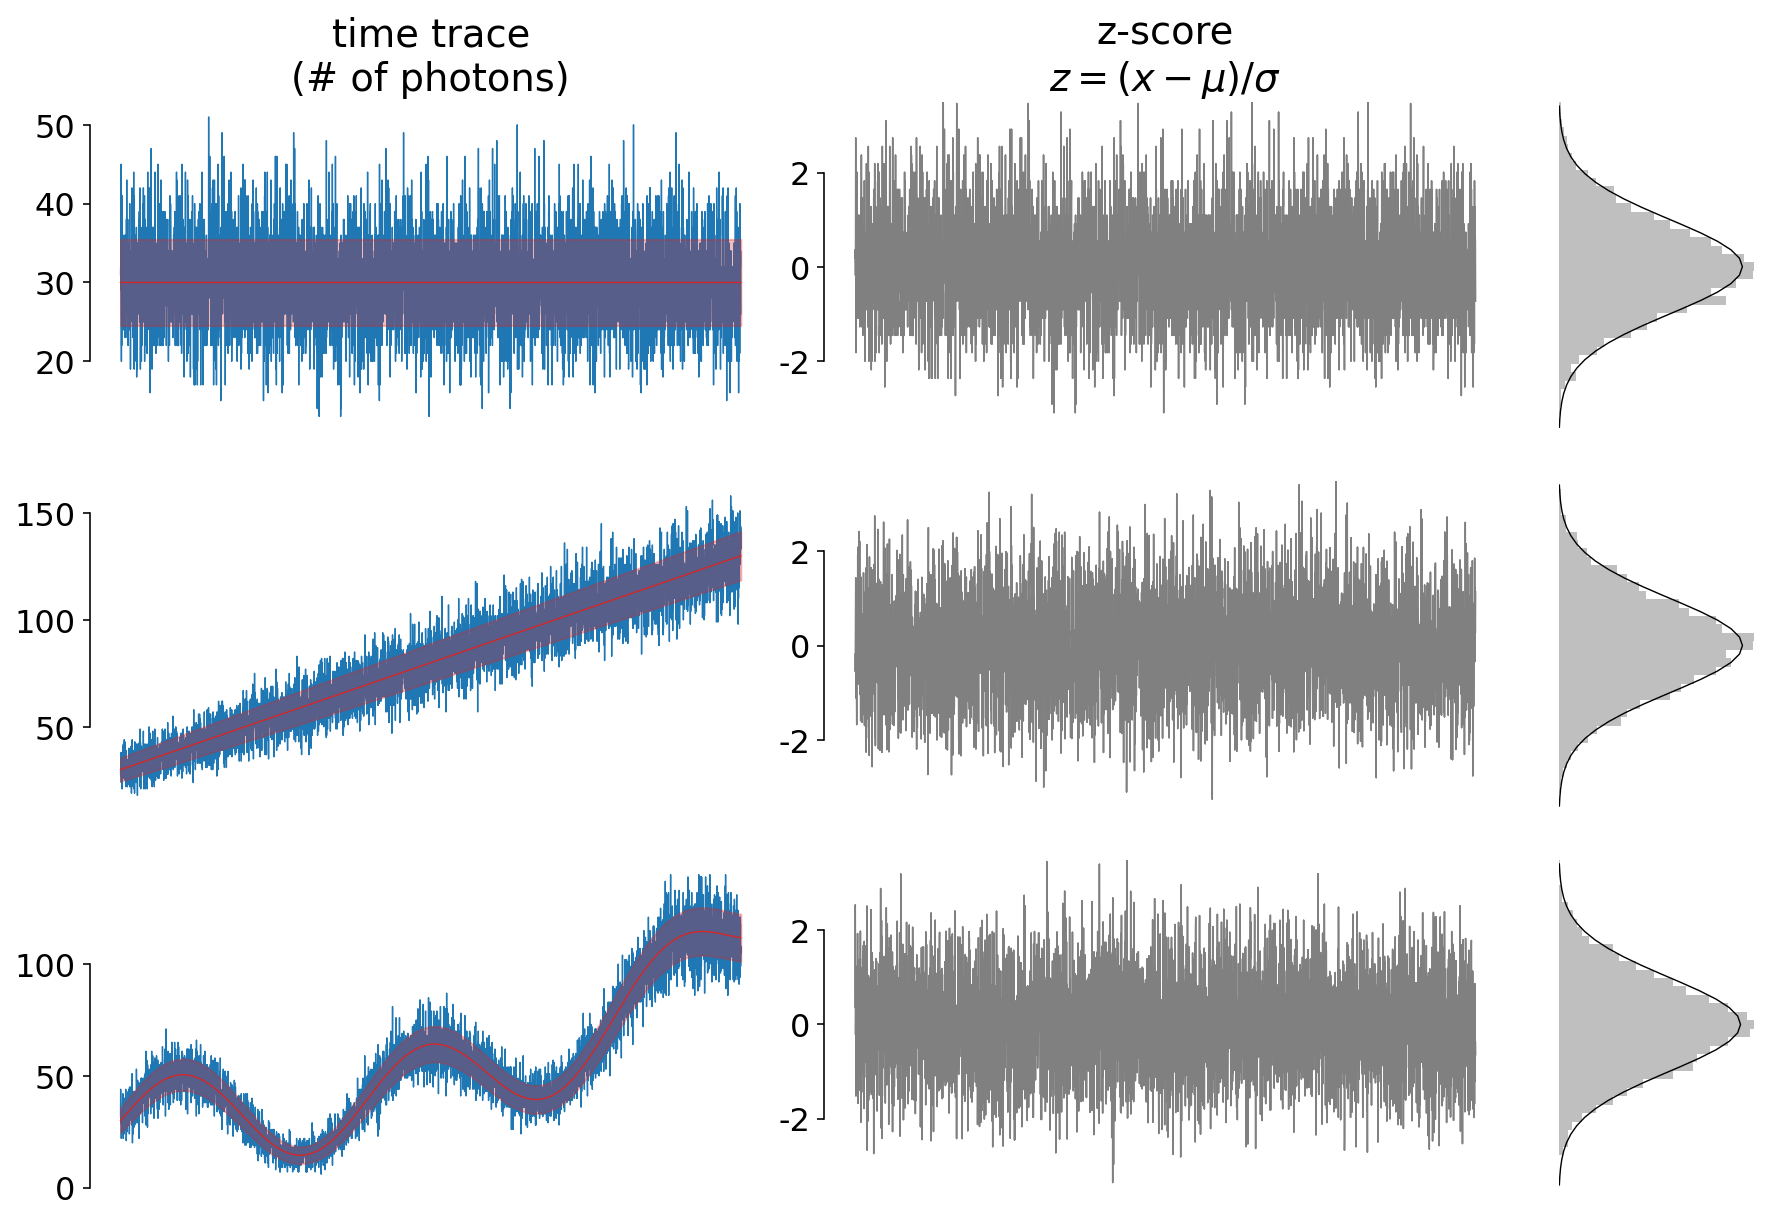

In [181]:
mu0 = 30
lw = .7
Npoints = 5000
np.random.seed(0)
bins = np.linspace(-3.5,3.5,40)
binc = (bins[:-1]+bins[1:])/2
# with plt.style.context("default"):
fig, axs = plt.subplots(3,3,figsize=(15,10), gridspec_kw={"width_ratios":[1,1,.3]})
for i,mu in enumerate([
    [mu0]*Npoints,
    mu0+.02*np.arange(Npoints),
    mu0
#     +.02*np.arange(Npoints)
    +np.sin((np.arange(Npoints)/np.pi/100))*20
#     +np.sin((np.arange(Npoints)/np.pi/200))*30+.03*np.arange(Npoints)
    +(np.exp((np.arange(Npoints)*1/Npoints)**2)-1)*50
    #+np.sin(np.arange(Npoints)/np.pi/600)*10
]):
    mu = np.maximum(1,mu)
    x = dst.poisson(mu=mu).rvs()
    ax = axs[i,0]
    ax.plot(x,label=r"trace $x$",lw=lw, clip_on=True)
    ax.plot(mu,color="C3", lw=lw)
    ax.fill_between(np.arange(Npoints),mu+mu**.5,mu-mu**.5,color="C3",alpha = .3, zorder=10)
    axs[i,1].plot((x-mu)/mu**.5,lw=lw,color="grey")
    axs[i,1].plot((x-mu)/mu**.5,lw=lw,color="grey")
    axs[i,2].hist((x-mu)/mu**.5,bins, color="grey", orientation="horizontal", density=True, alpha =.5)
    axs[i,2].plot(dst.norm.pdf(binc), binc, color="k",lw=lw)
# for ax in axs[:,0]:
#     ax.set_ylabel("# of photons")
# for ax in axs[:,1]:
#     ax.set_ylabel("z-score")
for ax in axs[:,1:].flat:
    ax.set_ylim(-3.5,3.5)
axs[0,0].set_title("time trace\n(# of photons)")
axs[0,1].set_title("z-score\n"+r"$z=(x-\mu)/\sigma$")

plt.subplots_adjust(wspace=.1, hspace=.15)

for ax in axs[:,2].flat:
    ax.set_xticks([])
    for sp in ["top","right","bottom"]:
        ax.spines[sp].set_visible(False)
for ax in axs[:,:2].flat:
    ax.set_xticks([])
    for sp in ["top","right","bottom"]:
        ax.spines[sp].set_visible(False)
for ax in axs[:,1]:
    ax.spines["left"].set_bounds(-2,2)
    ax.set_yticks([-2,0,2])
    ax.set_yticklabels([-2,0,2])
for ax in axs[:,2]:
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
#     ax.spines["left"].set_position(("outward",10))
#     yt = [-2,0,2]
#     ax.spines["left"].set_bounds(yt[0], yt[-1])
#     ax.set_yticks(yt)
#     ax.set_yticklabels(yt)
for ax in axs[:,0]:
    yt = ax.get_yticks().copy()
    ax.spines["left"].set_bounds(yt[1],yt[-2])

In [135]:
fig.savefig("figures/z_score.png",dpi=300)

In [9]:
axs[0,0].get_yticks()

array([ 0.,  5., 10., 15., 20., 25.])

/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':
/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]
/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/opt/tljh/user/envs/physio_dev/lib/python3.7/site-packages

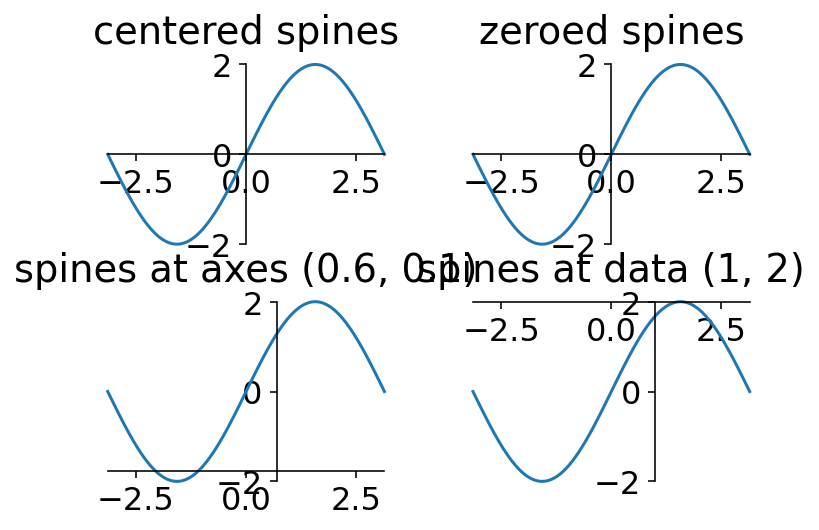

In [3]:
fig = plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.set_title('centered spines')
ax.plot(x, y)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('zeroed spines')
ax.plot(x, y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('spines at axes (0.6, 0.1)')
ax.plot(x, y)
ax.spines['left'].set_position(('axes', 0.6))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.1))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('spines at data (1, 2)')
ax.plot(x, y)
ax.spines['left'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 2))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')